In [1]:
import sys
sys.path.append('/home/sol/Escritorio/reservoirs_code/')
import numpy as np
import reservoirs
import readouts 
import datasets_sol as datasets

In [2]:
spectral_radius = 0.9
nodes=70
adj_matrix = np.random.randint(2,size=(nodes, nodes))
inputs_arr = np.random.randint(0, 2, (nodes, 1))*2 - 1

In [3]:
class _data_source():
    def __init__(self, name, func):
        self.name = name
        self.func = func


data_sources = [_data_source("30th order NARMA", datasets.narma30),
                _data_source("Gene activation 3", datasets.ga3)]

In [4]:
data_source = data_sources[1]
adj_matrix = adj_matrix
input_weight=inputs_arr
spectral_radius_scale=spectral_radius
with_bias=True
if hasattr(adj_matrix, "todense"):
    adj_matrix = adj_matrix.todense()
adj_matrix = np.asarray(adj_matrix)

In [5]:
# Generate dataset
[x, y, x_der] = data_source.func(sample_len=1000)

In [8]:
len(x), len (x[0])

(100, 1000)

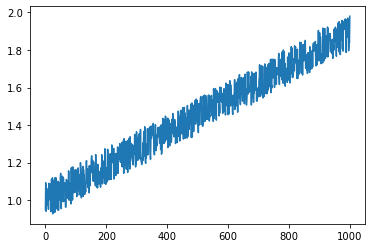

In [9]:
import matplotlib.pyplot as plt 
plt.plot(x[0])

In [15]:
len(y), y[0].shape

100

In [16]:
first_out=y[0]

In [18]:
first_out[:,0].shape

(1000,)

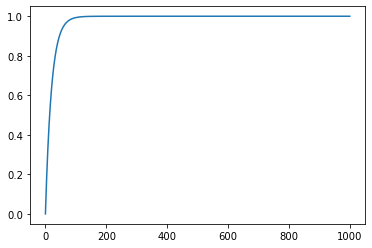

In [19]:
plt.plot(first_out[:,0])

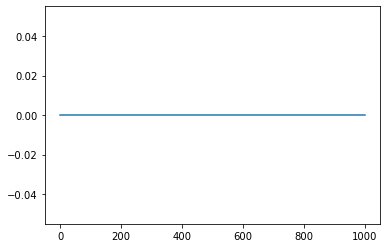

In [20]:
plt.plot(first_out[:,1])

In [ ]:
np.amax(np.absolute(np.linalg.eigvals(W)))

In [6]:
weights = adj_matrix * (np.random.random(adj_matrix.shape)*2-1)

if spectral_radius_scale:
    spectral_radius = reservoirs.get_spectral_radius(weights)
    if spectral_radius == 0:
        raise RuntimeError("Nilpotent adjacency matrix matrix")
    weights *= spectral_radius_scale / spectral_radius

in_scaling = 0.05
in_weight = input_weight * in_scaling

In [7]:
in_weight.T.shape

(1, 70)

In [23]:
x_der.shape

AttributeError: 'list' object has no attribute 'shape'

In [1]:
res_dynamics = [reservoirs.simulate_reservoir_dynamics(weights.T, in_weight.T,
                                            i_sig.ravel())
                for i_sig in x]

0
1
2
3
4
5
6
7
8
9


In [11]:
len(x_der[0])

TypeError: object of type 'float' has no len()

In [12]:
res_dynamics = [reservoirs.simulate_reservoir_dynamics(weights, in_weight, input_der, 1000) for input_der in x_der]

In [15]:
rregr = readouts.RidgeRegression(use_bias=with_bias)
[rregr.train(x_train, y_train)
    for x_train, y_train in zip(res_dynamics[:-1], y[:-1])]
pred = rregr(res_dynamics[-1])
#nrmse = utils.nrmse(pred, y[-1])

In [22]:
len(pred), len(pred[0])

(1000, 3)

In [24]:
len(pred[:,0])

1000

In [25]:
len( y[-1][:,0])

1000

In [21]:
len( y[-1]), len( y[-1][:,0])

(1000, 3)

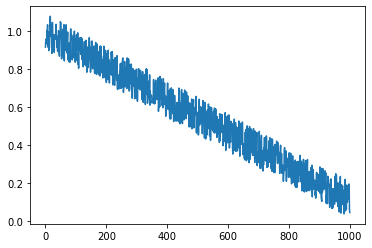

In [30]:
import matplotlib.pyplot as plt 
plt.plot(x[-1])

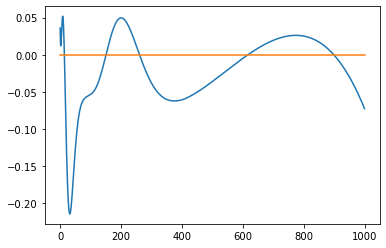

In [26]:
import matplotlib.pyplot as plt 
plt.plot(pred[:,0])
plt.plot(y[-1][:,0])

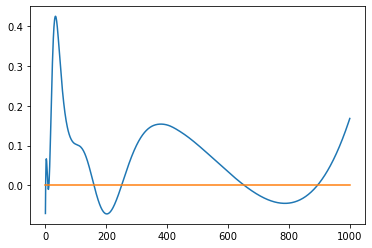

In [27]:
plt.plot(pred[:,1])
plt.plot(y[-1][:,1])

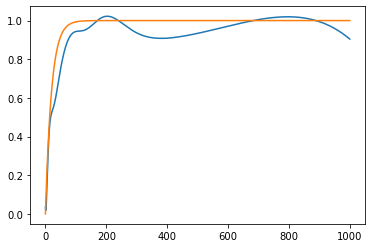

In [28]:
plt.plot(pred[:,2])
plt.plot(y[-1][:,2])

In [13]:
rregr = readouts.RidgeRegression(use_bias=with_bias)
[rregr.train(x_train, y_train)
    for x_train, y_train in zip(res_dynamics[:], y[:])]
#pred = rregr(res_dynamics[-1])
#nrmse = utils.nrmse(pred, y[-1])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
type(inputs[0]), inputs[0].shape

(numpy.ndarray, (1000, 1))

In [6]:
def lineal(a,b, x):
    return a*x + b

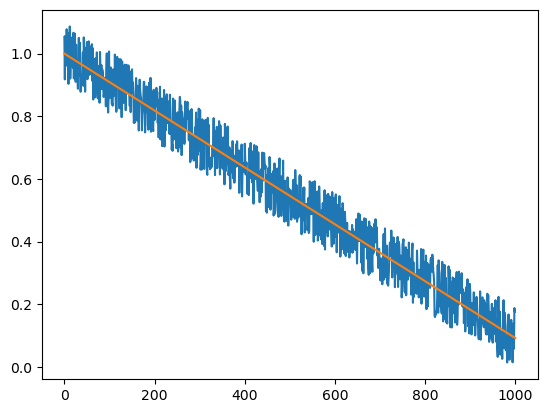

In [11]:
import matplotlib.pyplot as plt
import numpy as np
times = np.linspace(0, len(inputs[32]), len(inputs[32]))
plt.plot(inputs[32])
plt.plot( times, input_der[32]*times + 1)

In [2]:
inputs, outputs, input_der = datasets.narma30(n_samples=100, sample_len=1000)

In [3]:
type(inputs[0]), inputs[0].shape

(numpy.ndarray, (1000, 1))

In [6]:
type(outputs[0]), outputs[0].shape

(numpy.ndarray, (1000, 1))

In [5]:
type(inputs), type(outputs)

(list, list)

In [11]:
type(inputs[0]), inputs[0].shape

(numpy.ndarray, (1000,))

In [12]:
type(outputs[0]), outputs[0].shape

(numpy.ndarray, (1000, 3))

In [14]:
type(input_der[0])

float

In [17]:
len(input_der), input_der[0].shape

AttributeError: 'float' object has no attribute 'shape'

In [15]:
input_der[0]

9.911203495266864e-05